In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("/Users/anniepang/Downloads/music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("/Users/anniepang/Downloads/dataset.csv")

In [25]:
data1.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [26]:
data2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Data Cleaning

## Cleaned data 1 "tempo" column

In [27]:
data1['tempo'] = data1['tempo'].replace({'\?': ''}, regex=True)

# Convert the 'Tempo' column to numeric 
data1['tempo'] = pd.to_numeric(data1['tempo'], errors='coerce')

# Now 'Tempo' column contains values without "?"

print(len(data1[data1["tempo"] == "?"]))
print(len(data1))


0
50005


In [28]:
import pandas as pd

# data1 'tempo' column
# Convert 'tempo' column to numeric
data1['tempo'] = pd.to_numeric(data1['tempo'], errors='coerce')

# Calculate the average tempo
average_tempo = data1['tempo'].mean()

# Fill missing values in 'tempo' column with the average tempo
data1['tempo'] = data1['tempo'].fillna(average_tempo)
#data1.isna().sum()



# data2 'tempo' column
# Convert 'tempo' column to numeric
data2['tempo'] = pd.to_numeric(data2['tempo'], errors='coerce')

# Calculate the average tempo
average_tempo = data2['tempo'].mean()

# Fill missing values in 'tempo' column with the average tempo
data2['tempo'] = data2['tempo'].fillna(average_tempo)

In [29]:
data1_cleaned = data1
data2_cleaned = data2

data1_cleaned = data1.dropna()
data1_cleaned

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.028,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.043,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.886,4-Apr,0.354,Hip-Hop


In [30]:
data2_cleaned = data2.dropna()
data2_cleaned

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [31]:
data1_cleaned.isna().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

# One Hot encoding -- converted categorical values to numerical values

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder()

#Data 1


#make key, mode into One Hot encoding
#music_genre into label encoding
onehot =OneHotEncoder(sparse=False)
onehot.fit(data1_cleaned[['key', 'mode']])
onehotencoded = onehot.transform(data1_cleaned[['key', 'mode']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data1_cleaned[['key', 'mode']].columns) for cat in onehot.categories_[i]]
onehotdf = pd.DataFrame(onehotencoded, columns=categorical_columns)
concat_data1 = pd.concat([data1_cleaned, onehotdf], axis=1)
# Drop the original categorical columns
df1_encoded = concat_data1.drop(columns = ['key', 'mode'], axis=1)

df1_encoded_cleaned = df1_encoded.dropna()
df1_encoded_cleaned

/Users/anniepang/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.004680,0.652,-1.0,0.941,0.792000,0.115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.012700,0.622,218293.0,0.890,0.950000,0.124,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30097.0,Dillon Francis,Hurricane,28.0,0.003060,0.620,215613.0,0.755,0.011800,0.534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,62177.0,Dubloadz,Nitro,34.0,0.025400,0.774,166875.0,0.700,0.002530,0.157,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24907.0,What So Not,Divide & Conquer,32.0,0.004650,0.638,222369.0,0.587,0.909000,0.157,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,56911.0,Too $hort,Shake That Monkey,55.0,0.000577,0.937,278707.0,0.695,0.000032,0.295,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,20269.0,Unknown Mortal Orchestra,So Good at Being in Trouble,57.0,0.036300,0.829,230147.0,0.435,0.878000,0.119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49997,54580.0,Tee Grizzley,First Day Out,75.0,0.171000,0.587,254694.0,0.711,0.000000,0.125,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,64552.0,Logic,Growing Pains III,55.0,0.474000,0.514,246773.0,0.730,0.000000,0.511,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
df1_encoded_cleaned.isna().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
key_A               0
key_A#              0
key_B               0
key_C               0
key_C#              0
key_D               0
key_D#              0
key_E               0
key_F               0
key_F#              0
key_G               0
key_G#              0
mode_Major          0
mode_Minor          0
dtype: int64

In [34]:
#Data 2

#make key, mode into One Hot encoding
#music_genre into label encoding
onehot =OneHotEncoder(sparse=False)
onehot.fit(data2_cleaned[['key','mode','explicit' ]])
onehotencoded = onehot.transform(data2_cleaned[['key', 'mode', 'explicit']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data2_cleaned[['key', 'mode', 'explicit']].columns) for cat in onehot.categories_[i]]
onehotdf_2 = pd.DataFrame(onehotencoded, columns=categorical_columns)
concat_data2 = pd.concat([data2_cleaned, onehotdf_2], axis=1)
# Drop the original categorical columns
df2_encoded = concat_data2.drop(columns = ['key', 'mode', 'explicit'], axis=1)

df2_encoded_cleaned = df2_encoded.dropna()
df2_encoded_cleaned

/Users/anniepang/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,loudness,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,explicit_False,explicit_True
0,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,0.676,0.4610,-6.746,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,0.420,0.1660,-17.235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,0.438,0.3590,-9.734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3.0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,0.266,0.0596,-18.515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4.0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,0.618,0.4430,-9.681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,113994.0,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22.0,305454.0,0.331,0.1710,-15.668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
113995,113995.0,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21.0,384999.0,0.172,0.2350,-16.393,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
113996,113996.0,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22.0,385000.0,0.174,0.1170,-18.318,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
113997,113997.0,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22.0,271466.0,0.629,0.3290,-10.895,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0



# Changing Y into numerical values

In [35]:


# labelencoder = LabelEncoder()
# # data1['key_num'] = onehot_encoder.fit_transform(data1[['key']]).toarray()
# # data1['mode_num'] = onehot_encoder.fit_transform(data1[['mode']]).toarray()
# df1_encoded_cleaned['music_genre_num'] = labelencoder.fit_transform(df1_encoded_cleaned['music_genre']) #remain using labelencoder for Y variable
# #data1_cleaned = data1_cleaned.dropna(inplace=True)




# # data2['explicit_num'] = labelencoder.fit_transform(data2[['explicit']])
# df2_encoded_cleaned['track_genre_num'] = labelencoder.fit_transform(df2_encoded_cleaned['track_genre'])
# df2_encoded_cleaned

## Dropped missing values and unnecessary categorical columns

In [36]:
df1_encoded_cleaned_dropped = df1_encoded_cleaned.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date'])
df1_encoded_cleaned_dropped

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,27.0,0.004680,0.652,-1.0,0.941,0.792000,0.115,-5.201,0.0748,100.889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,31.0,0.012700,0.622,218293.0,0.890,0.950000,0.124,-7.043,0.0300,115.002,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28.0,0.003060,0.620,215613.0,0.755,0.011800,0.534,-4.617,0.0345,127.994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,34.0,0.025400,0.774,166875.0,0.700,0.002530,0.157,-4.498,0.2390,128.014,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32.0,0.004650,0.638,222369.0,0.587,0.909000,0.157,-6.266,0.0413,145.036,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,55.0,0.000577,0.937,278707.0,0.695,0.000032,0.295,-6.932,0.1340,99.997,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,57.0,0.036300,0.829,230147.0,0.435,0.878000,0.119,-10.136,0.0515,103.816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49997,75.0,0.171000,0.587,254694.0,0.711,0.000000,0.125,-6.330,0.4200,98.008,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,55.0,0.474000,0.514,246773.0,0.730,0.000000,0.511,-8.491,0.3870,167.655,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [37]:
df2_encoded_cleaned_dropped = df2_encoded_cleaned.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])
df2_encoded_cleaned_dropped

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,explicit_False,explicit_True
0,73.0,230666.0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,55.0,149610.0,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,57.0,210826.0,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,71.0,201933.0,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,82.0,198853.0,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22.0,305454.0,0.331,0.1710,-15.668,0.0350,0.9200,0.022900,0.0679,0.3270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
113995,21.0,384999.0,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
113996,22.0,385000.0,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
113997,22.0,271466.0,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [38]:
df1_encoded_cleaned_dropped.isna().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
music_genre         0
key_A               0
key_A#              0
key_B               0
key_C               0
key_C#              0
key_D               0
key_D#              0
key_E               0
key_F               0
key_F#              0
key_G               0
key_G#              0
mode_Major          0
mode_Minor          0
dtype: int64

# Random Forest Model 

## Baseline model:

Accuracy for Data 1: 0.56
Classification Report for Data 1:
              precision    recall  f1-score   support

 Alternative       0.44      0.36      0.40      1027
       Anime       0.79      0.74      0.77      1032
       Blues       0.61      0.55      0.58      1013
   Classical       0.82      0.86      0.84       947
     Country       0.56      0.58      0.57       995
  Electronic       0.65      0.62      0.64      1007
     Hip-Hop       0.35      0.39      0.37      1005
        Jazz       0.55      0.53      0.54       972
         Rap       0.34      0.32      0.33       997
        Rock       0.49      0.65      0.56      1004

    accuracy                           0.56      9999
   macro avg       0.56      0.56      0.56      9999
weighted avg       0.56      0.56      0.56      9999



<Figure size 1000x800 with 0 Axes>

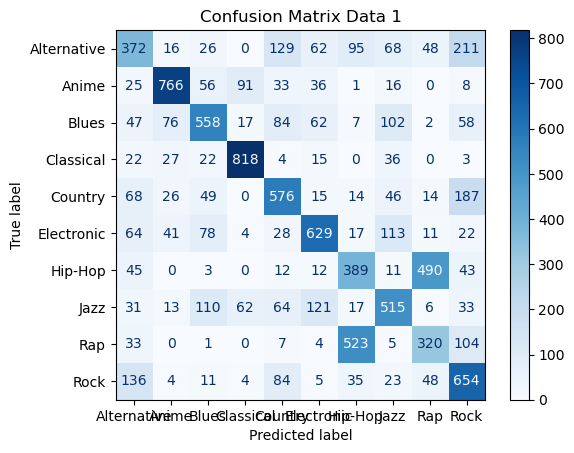


Accuracy for Data 2: 0.34
Classification Report for Data 2:
                   precision    recall  f1-score   support

         acoustic       0.28      0.24      0.26       213
         afrobeat       0.36      0.37      0.37       203
         alt-rock       0.06      0.06      0.06       215
      alternative       0.11      0.13      0.12       184
          ambient       0.35      0.35      0.35       197
            anime       0.19      0.16      0.17       193
      black-metal       0.58      0.65      0.61       210
        bluegrass       0.41      0.60      0.49       205
            blues       0.17      0.13      0.15       214
           brazil       0.04      0.04      0.04       197
        breakbeat       0.57      0.50      0.53       199
          british       0.17      0.09      0.12       214
         cantopop       0.32      0.33      0.32       193
    chicago-house       0.57      0.58      0.57       206
         children       0.53      0.51      0.52     

<Figure size 10000x8000 with 0 Axes>

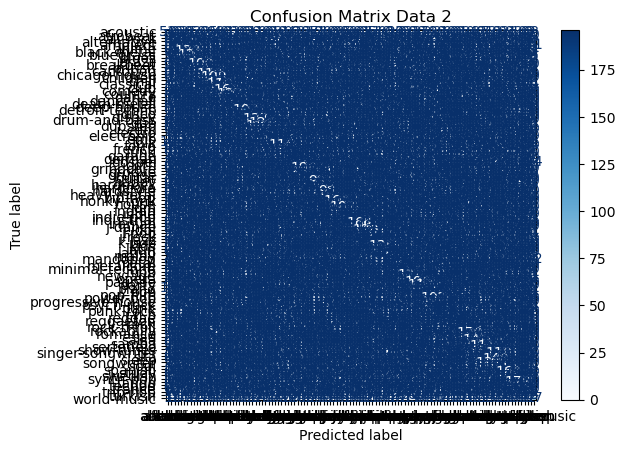

In [39]:
X_data1 = df1_encoded_cleaned_dropped.drop(columns=['music_genre'])
# "energy", "instrumentalness", "key", "mode", "speechiness", "tempo"], axis=1)
y_data1 = df1_encoded_cleaned_dropped['music_genre']

X_data2 = df2_encoded_cleaned_dropped.drop(columns=['track_genre'])
#"energy", "key", "mode", "speechiness", "instrumentalness", "tempo", "time_signature"], axis=1)
y_data2 = df2_encoded_cleaned_dropped['track_genre']


# Split the data into training and testing sets
X_train_data1, X_test_data1, y_train_data1, y_test_data1 = train_test_split(X_data1, y_data1, test_size=0.2, random_state=42)
X_train_data2, X_test_data2, y_train_data2, y_test_data2 = train_test_split(X_data2, y_data2, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier_data1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_data2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model for data1
rf_classifier_data1.fit(X_train_data1, y_train_data1)

# Train the model for data2
rf_classifier_data2.fit(X_train_data2, y_train_data2)

# Make predictions on the test sets
y_pred_data1 = rf_classifier_data1.predict(X_test_data1)
y_pred_data2 = rf_classifier_data2.predict(X_test_data2)


from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the models for data1
accuracy_data1 = accuracy_score(y_test_data1, y_pred_data1)
print(f"Accuracy for Data 1: {accuracy_data1:.2f}")

# Print classification report for data1
print("Classification Report for Data 1:")
print(classification_report(y_test_data1, y_pred_data1))

cm_val1 = confusion_matrix(y_test_data1, y_pred_data1)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_matrix=cm_val1, display_labels=np.unique(y_test_data1)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 1')
plt.show()

# Print confusion matrix for data1
# print("Confusion Matrix for Data 1:")
# print(confusion_matrix(y_test_data1, y_pred_data1))

# Evaluate the models for data2
accuracy_data2 = accuracy_score(y_test_data2, y_pred_data2)
print(f"\nAccuracy for Data 2: {accuracy_data2:.2f}")

# Print classification report for data2
print("Classification Report for Data 2:")
print(classification_report(y_test_data2, y_pred_data2))

cm_val2 = confusion_matrix(y_test_data2, y_pred_data2)
plt.figure(figsize=(100, 80))
ConfusionMatrixDisplay(confusion_matrix=cm_val2, display_labels=np.unique(y_test_data2)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 2')
plt.show()

# Print confusion matrix for data2
# print("Confusion Matrix for Data 2:")
# print(confusion_matrix(y_test_data2, y_pred_data2))

In [40]:
# Print confusion matrix for data1
print("Confusion Matrix for Data 1:")
print(confusion_matrix(y_test_data1, y_pred_data1))

Confusion Matrix for Data 1:
[[372  16  26   0 129  62  95  68  48 211]
 [ 25 766  56  91  33  36   1  16   0   8]
 [ 47  76 558  17  84  62   7 102   2  58]
 [ 22  27  22 818   4  15   0  36   0   3]
 [ 68  26  49   0 576  15  14  46  14 187]
 [ 64  41  78   4  28 629  17 113  11  22]
 [ 45   0   3   0  12  12 389  11 490  43]
 [ 31  13 110  62  64 121  17 515   6  33]
 [ 33   0   1   0   7   4 523   5 320 104]
 [136   4  11   4  84   5  35  23  48 654]]


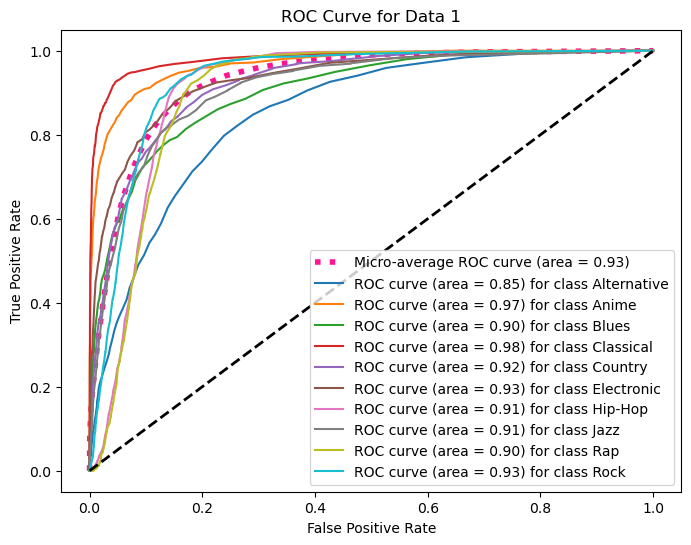

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Get predicted probabilities for data 1
y_prob_data1 = rf_classifier_data1.predict_proba(X_test_data1)

# Binarize the labels for each class using one-vs-all (OvA) strategy
y_test_data1_binary = label_binarize(y_test_data1, classes=np.unique(y_test_data1))

# Initialize lists to store fpr, tpr, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC Curve and AUC for each class
for i in range(len(np.unique(y_test_data1))):
    fpr[i], tpr[i], _ = roc_curve(y_test_data1_binary[:, i], y_prob_data1[:, i])
    roc_auc[i] = roc_auc_score(y_test_data1_binary[:, i], y_prob_data1[:, i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_data1_binary.ravel(), y_prob_data1.ravel())
roc_auc_micro = roc_auc_score(y_test_data1_binary, y_prob_data1, average="micro")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (area = {roc_auc_micro:.2f})', color='deeppink', linestyle=':', linewidth=4)

for i in range(len(np.unique(y_test_data1))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {np.unique(y_test_data1)[i]}')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Data 1')
plt.legend(loc='lower right')
plt.show()


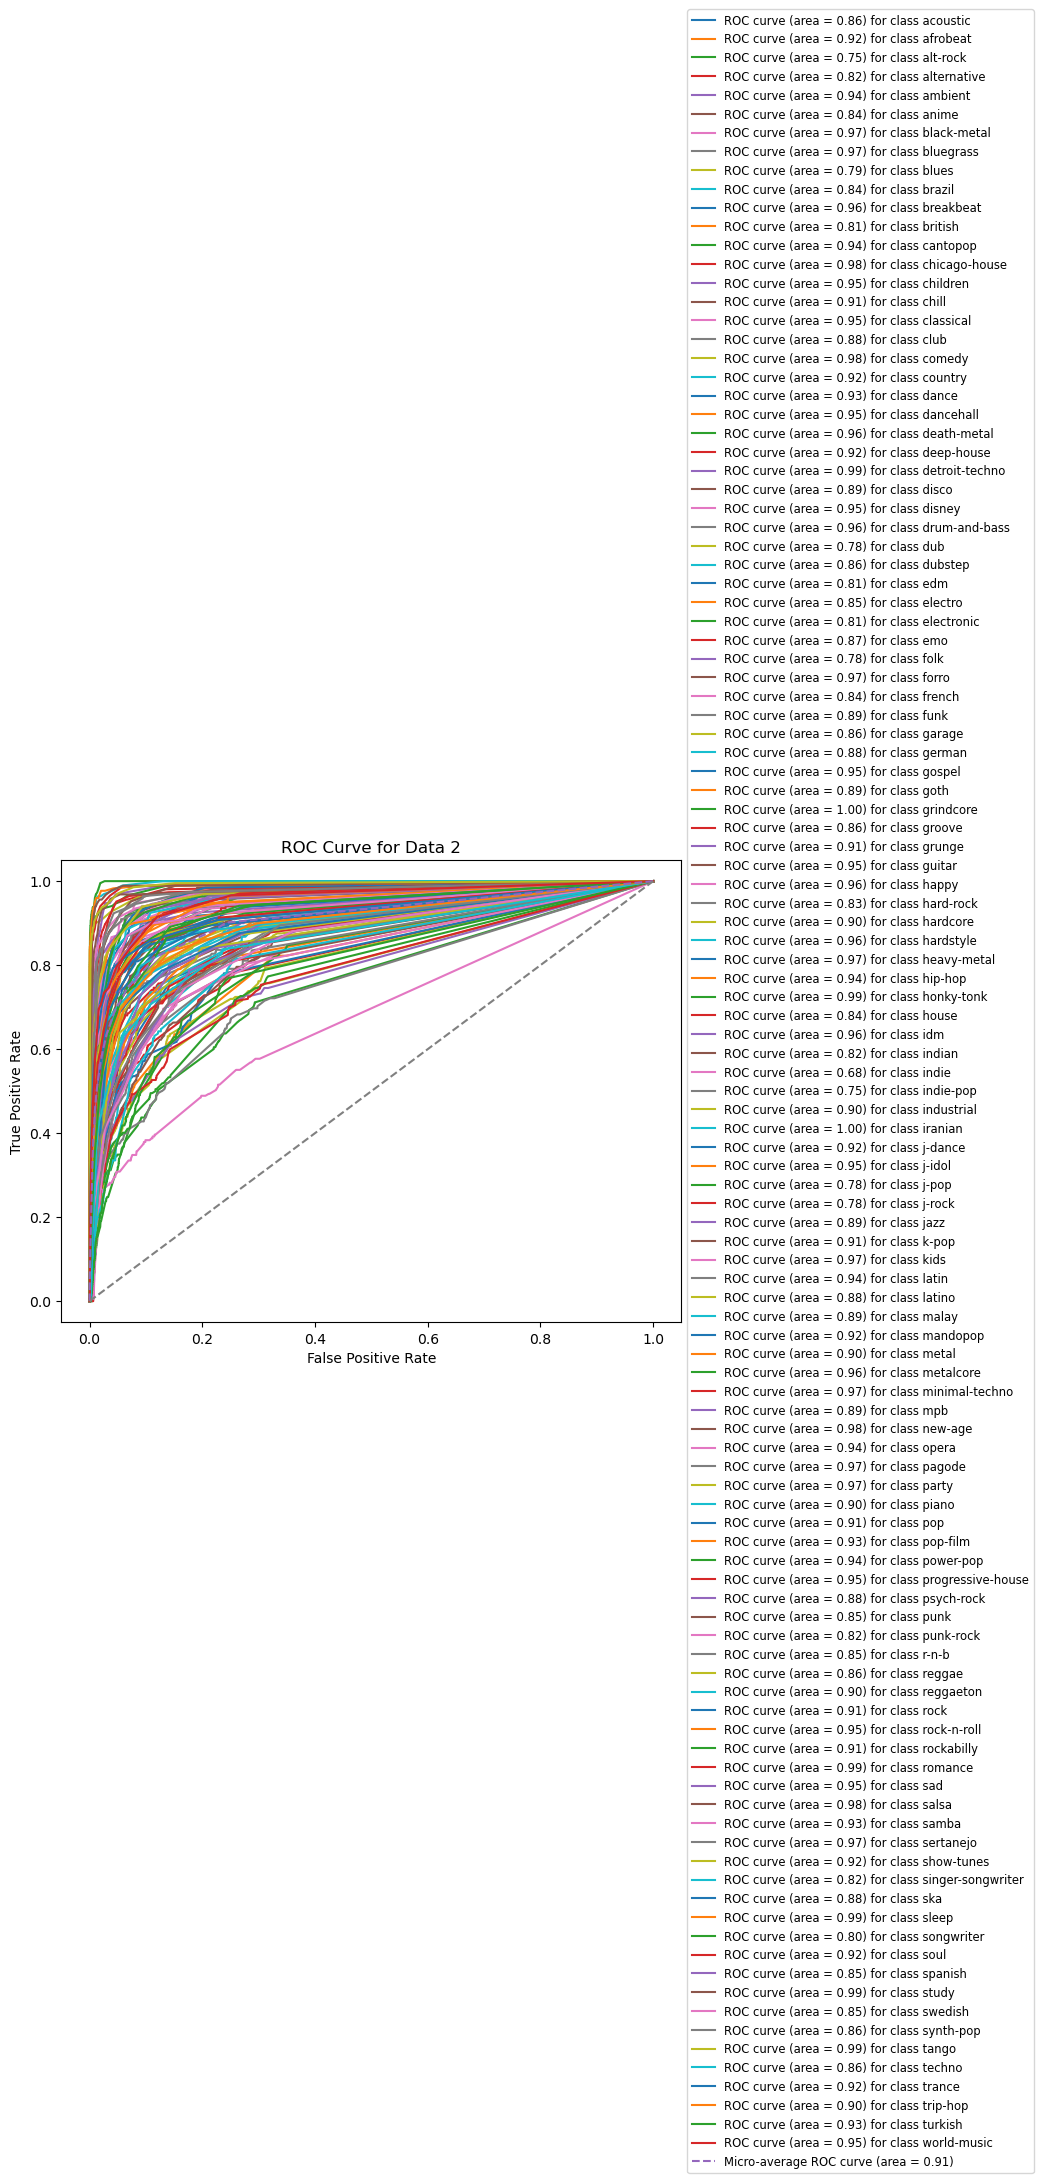

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Convert multiclass labels to binary format
lb = LabelBinarizer()
lb.fit(y_test_data2)
y_test_data2_binary = lb.transform(y_test_data2)

# Calculate probabilities for each class
y_prob_data2 = rf_classifier_data2.predict_proba(X_test_data2)

# Calculate ROC Curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_data2_binary[:, i], y_prob_data2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_data2_binary.ravel(), y_prob_data2.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {lb.classes_[i]}')
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (area = {roc_auc_micro:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Data 2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')  # Move legend outside the graph
plt.show()


## Improved Model: using normalization

Accuracy for Data 1: 0.56
Classification Report for Data 1:
              precision    recall  f1-score   support

 Alternative       0.45      0.37      0.41      1027
       Anime       0.79      0.74      0.76      1032
       Blues       0.61      0.56      0.58      1013
   Classical       0.82      0.86      0.84       947
     Country       0.57      0.58      0.57       995
  Electronic       0.66      0.63      0.64      1007
     Hip-Hop       0.35      0.37      0.36      1005
        Jazz       0.55      0.53      0.54       972
         Rap       0.34      0.33      0.34       997
        Rock       0.49      0.66      0.56      1004

    accuracy                           0.56      9999
   macro avg       0.56      0.56      0.56      9999
weighted avg       0.56      0.56      0.56      9999



<Figure size 1000x800 with 0 Axes>

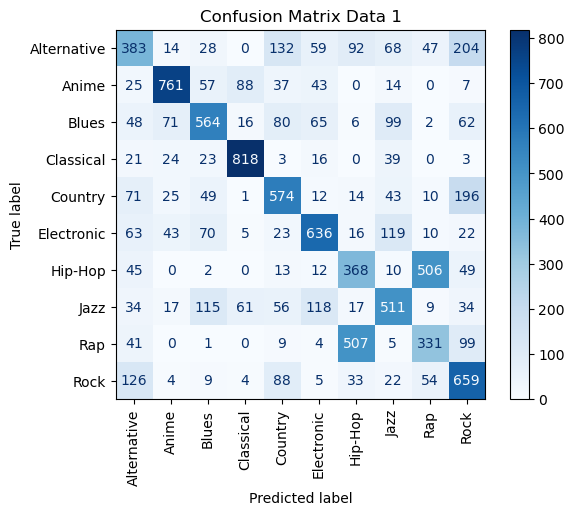

Confusion Matrix for Data 1:
[[383  14  28   0 132  59  92  68  47 204]
 [ 25 761  57  88  37  43   0  14   0   7]
 [ 48  71 564  16  80  65   6  99   2  62]
 [ 21  24  23 818   3  16   0  39   0   3]
 [ 71  25  49   1 574  12  14  43  10 196]
 [ 63  43  70   5  23 636  16 119  10  22]
 [ 45   0   2   0  13  12 368  10 506  49]
 [ 34  17 115  61  56 118  17 511   9  34]
 [ 41   0   1   0   9   4 507   5 331  99]
 [126   4   9   4  88   5  33  22  54 659]]

Accuracy for Data 2: 0.34
Classification Report for Data 2:
                   precision    recall  f1-score   support

         acoustic       0.27      0.24      0.25       213
         afrobeat       0.40      0.37      0.39       203
         alt-rock       0.05      0.05      0.05       215
      alternative       0.12      0.14      0.13       184
          ambient       0.35      0.35      0.35       197
            anime       0.21      0.17      0.18       193
      black-metal       0.58      0.67      0.62       210
      

: 

In [50]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Create a pipeline for data1 with normalization
pipeline_data1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Create a pipeline for data2 with normalization
pipeline_data2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model for data1
pipeline_data1.fit(X_train_data1, y_train_data1)

# Train the model for data2
pipeline_data2.fit(X_train_data2, y_train_data2)

# Make predictions on the test sets
y_pred_data1 = pipeline_data1.predict(X_test_data1)
y_pred_data2 = pipeline_data2.predict(X_test_data2)

# Evaluate the models for data1
accuracy_data1 = accuracy_score(y_test_data1, y_pred_data1)
print(f"Accuracy for Data 1: {accuracy_data1:.2f}")

# Print classification report for data1
print("Classification Report for Data 1:")
print(classification_report(y_test_data1, y_pred_data1))

cm_val1 = confusion_matrix(y_test_data1, y_pred_data1)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_matrix=cm_val1, display_labels=np.unique(y_test_data1)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 1')
plt.xticks(rotation=90)
plt.show()

# Print confusion matrix for data1
print("Confusion Matrix for Data 1:")
print(confusion_matrix(y_test_data1, y_pred_data1))

# Evaluate the models for data2
accuracy_data2 = accuracy_score(y_test_data2, y_pred_data2)
print(f"\nAccuracy for Data 2: {accuracy_data2:.2f}")

# Print classification report for data2
print("Classification Report for Data 2:")
print(classification_report(y_test_data2, y_pred_data2))



# Print confusion matrix for data2
# print("Confusion Matrix for Data 2:")
# print(confusion_matrix(y_test_data2, y_pred_data2))



Accuracy for Data 2: 0.34
Classification Report for Data 2:
                   precision    recall  f1-score   support

         acoustic       0.27      0.24      0.25       213
         afrobeat       0.40      0.37      0.39       203
         alt-rock       0.05      0.05      0.05       215
      alternative       0.12      0.14      0.13       184
          ambient       0.35      0.35      0.35       197
            anime       0.21      0.17      0.18       193
      black-metal       0.58      0.67      0.62       210
        bluegrass       0.41      0.61      0.49       205
            blues       0.17      0.13      0.15       214
           brazil       0.04      0.04      0.04       197
        breakbeat       0.59      0.50      0.54       199
          british       0.20      0.09      0.13       214
         cantopop       0.32      0.33      0.32       193
    chicago-house       0.58      0.59      0.59       206
         children       0.53      0.52      0.53     

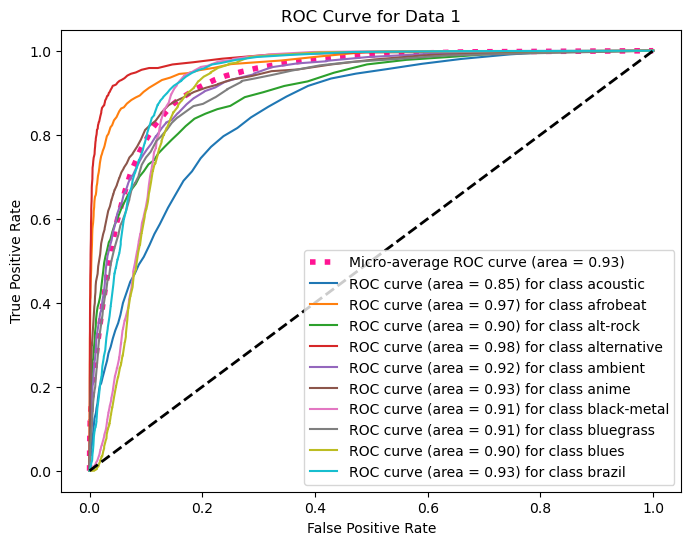

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Get predicted probabilities for data 1
y_prob_data1 = pipeline_data1.predict_proba(X_test_data1)

# Binarize the labels for each class using one-vs-all (OvA) strategy
y_test_data1_binary = label_binarize(y_test_data1, classes=np.unique(y_test_data1))

# Initialize lists to store fpr, tpr, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC Curve and AUC for each class
for i in range(len(np.unique(y_test_data1))):
    fpr[i], tpr[i], _ = roc_curve(y_test_data1_binary[:, i], y_prob_data1[:, i])
    roc_auc[i] = roc_auc_score(y_test_data1_binary[:, i], y_prob_data1[:, i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_data1_binary.ravel(), y_prob_data1.ravel())
roc_auc_micro = roc_auc_score(y_test_data1_binary, y_prob_data1, average="micro")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (area = {roc_auc_micro:.2f})', color='deeppink', linestyle=':', linewidth=4)

for i in range(len(np.unique(y_test_data1))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {lb.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Data 1')
plt.legend(loc='lower right')
plt.show()


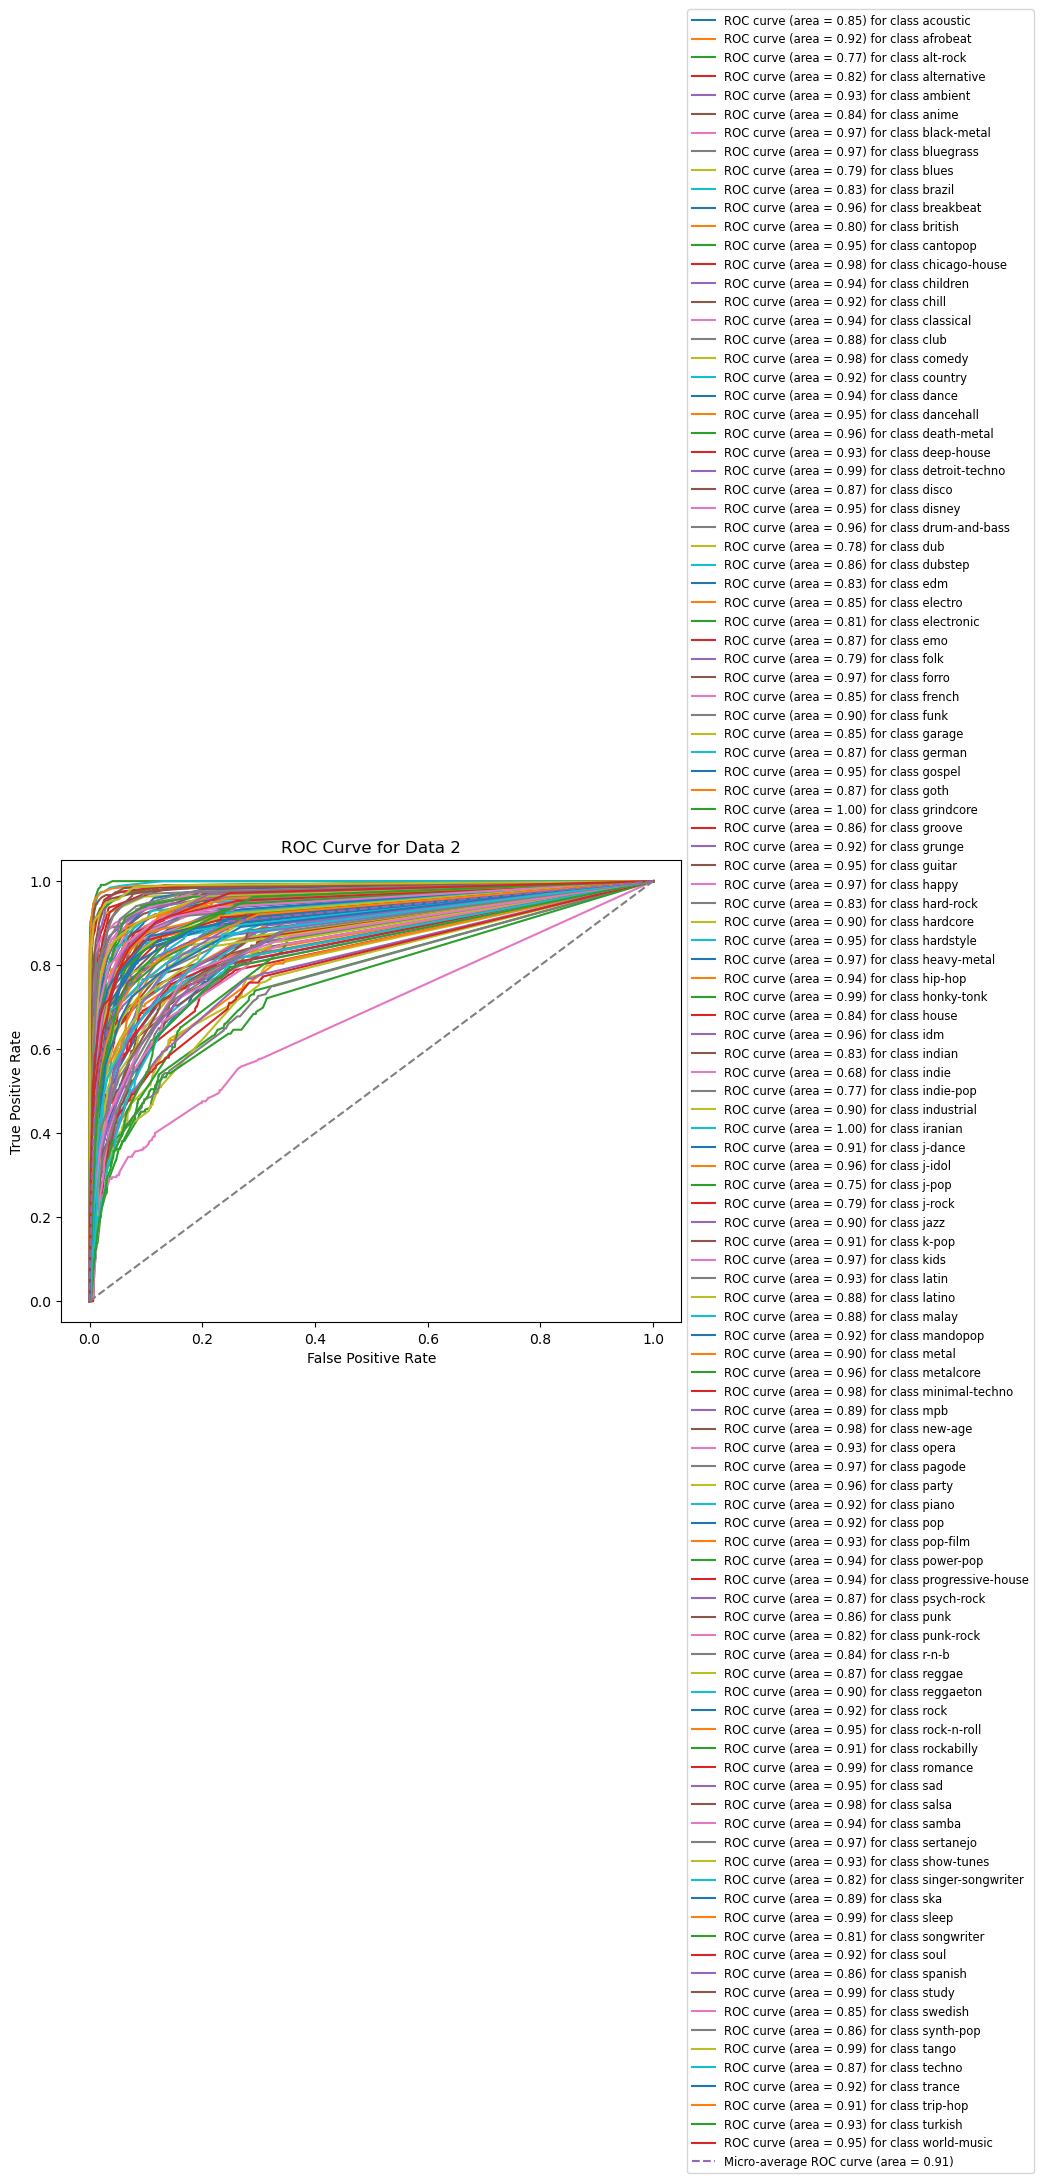

In [46]:
from sklearn.metrics import roc_curve, auc

# Convert multiclass labels to binary format
lb = LabelBinarizer()
lb.fit(y_test_data2)
y_test_data2_binary = lb.transform(y_test_data2)

# Calculate probabilities for each class
y_prob_data2 = pipeline_data2.predict_proba(X_test_data2)

# Calculate ROC Curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_data2_binary[:, i], y_prob_data2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_data2_binary.ravel(), y_prob_data2.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {lb.classes_[i]}')
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (area = {roc_auc_micro:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Data 2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')  # Move legend outside the graph
plt.show()


In [47]:


roc_auc_micro
#print(tpr_micro)

0.9075407558520389

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>